# 2022.07.10 Version1: pcap-ng, pcap => Plotting

In [8]:
#Import 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

TH_SYN = 0x02
TH_ACK = 0x10

#sns.set_style('whitegrid')
#%matplotlib inline

In [9]:
#Plot data
def plotting(datalist, title):
    df = pd.DataFrame(datalist, columns=metaif)
    del df['TTL']
    del df['SRCIP']
    #print(df.head())
    #del df['DPORT']
    #del df['DSTIP']
    
    #可視化する
    g = sns.pairplot(data = df, corner=True)
    g.fig.suptitle(title)

In [10]:
#Import
import dpkt 
import csv
import glob

#Get List of pcap file
metaif = ["IPID", "TTL","SRCIP", "DSTIP", "SPORT", "DPORT", "TSEQ", "WINDS"]
#file1 = glob.glob("/home/pison/D1/cluster/pcap/e70*.pcap")
file2 = glob.glob("/home/pison/D1/cluster/pcap/e435*.pcap")
#files = file1 + file2
#files = glob.glob("/home/pison/D1/cluster/pcap/pison*.pcap")
files = sorted(file2)[:1]
print(files)

['/home/pison/D1/cluster/pcap/e435_20160328.pcap']


e435_20160328.pcap:2602


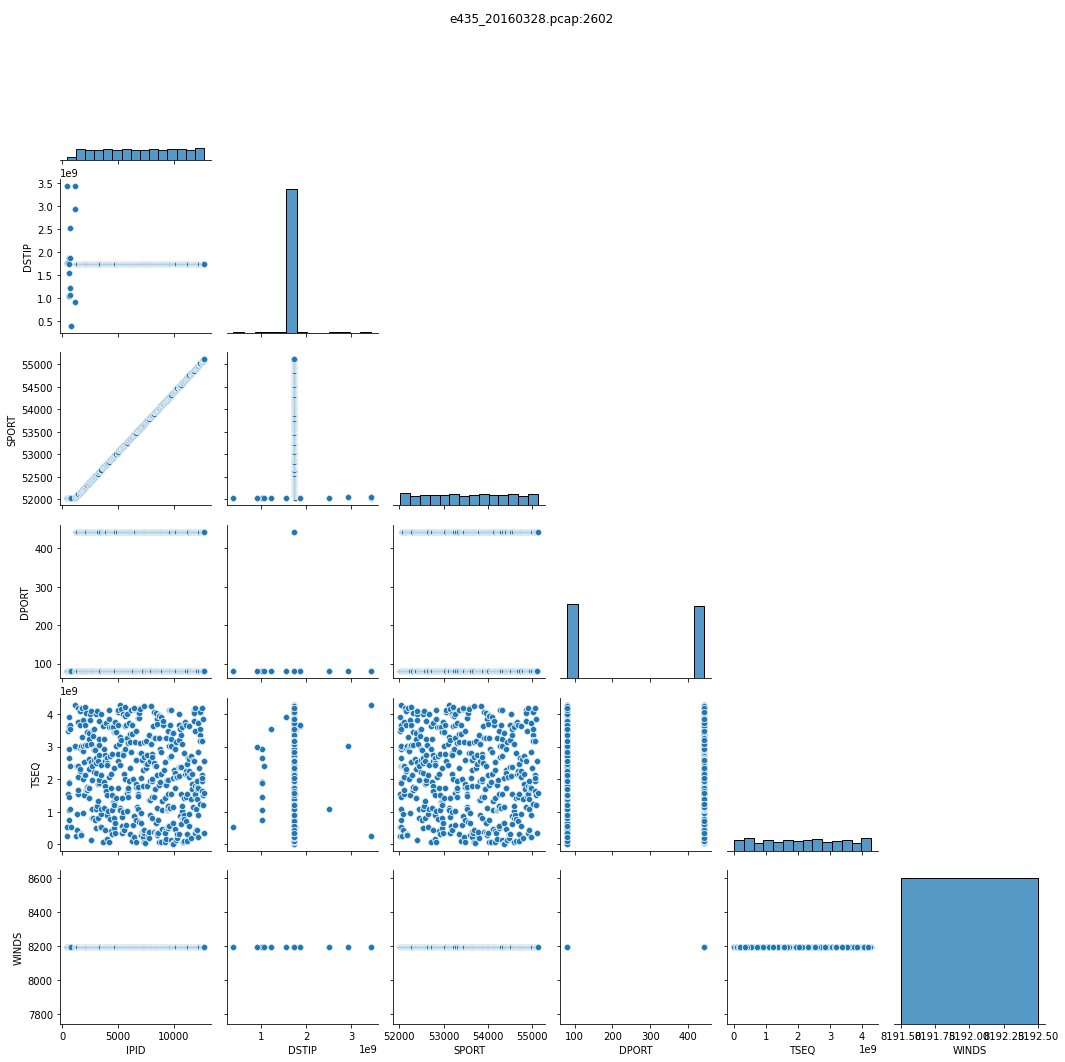

In [12]:
#Make Data from each pcap file
for file in files:
    datalist = []
    fp = open(file, "rb")
    sig = (fp.read(4)).hex()
    fp.seek(0)
    
    if sig == 'd4c3b2a1':
        packets = dpkt.pcap.Reader(fp)
    elif sig == '0a0d0d0a':
        packets = dpkt.pcapng.Reader(fp)
        
    #Packets を処理する
    for ts, buf in packets:
        try: 
            eth = dpkt.ethernet.Ethernet(buf)
        except:
            print("Fail parse Frame")

        #Verify: IP Packet
        if type(eth.data) == dpkt.ip.IP:
            ip = eth.data
            srcip 	= int.from_bytes(ip.src, "big")
            dstip	= int.from_bytes(ip.dst, "big")
            ipid 	= ip.id
            ipttl 	= ip.ttl

            #Verify: TCP packet
            if ip.p == dpkt.ip.IP_PROTO_TCP:
                tcp 	= ip.data
                try:
                    tsport 	= tcp.sport
                    tdport 	= tcp.dport
                    tseq 	= tcp.seq
                    twin 	= tcp.win
                    if tcp.flags == TH_SYN and tcp.flags != TH_ACK:
                        phrase = [ipid, ipttl, srcip, dstip, tsport, tdport, tseq, twin]
                        datalist.append(phrase)

                except:
                    continue
    filename = os.path.basename(file)
    title = filename.ljust(5, " ")+ ":" + str(len(datalist))
    #with open(OUTFILE, "w") as ofile:
    #    write = csv.writer(ofile)
    #    write.writerow(metaif)
    #    write.writerows(datalist)
        
    print(title)
    plotting(datalist, title)

# Plot Malware's Data on Day16 (330 Packets)

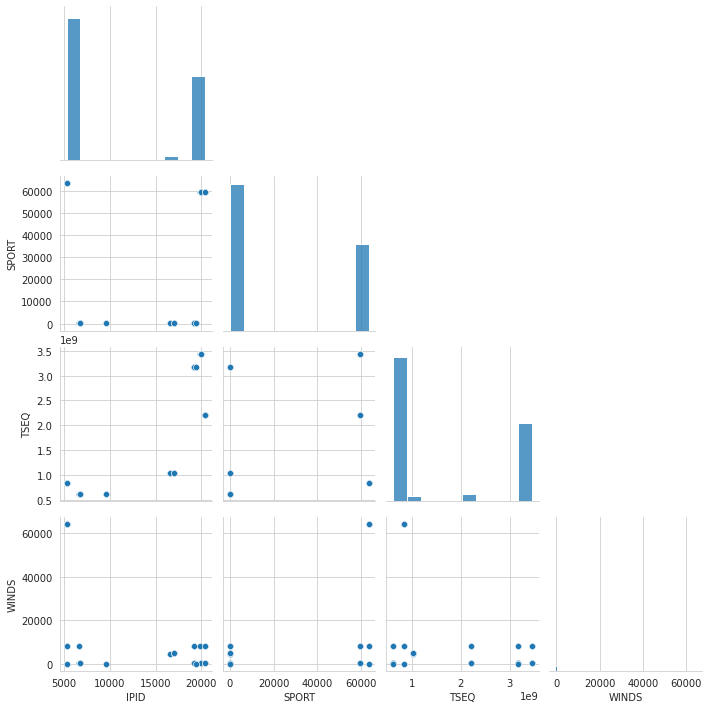

In [263]:
#可視化する
#plt.figure(figsize=(8,5))
sns.pairplot(data = df, corner=True)
plt.show()

# Plot Malware's Data on Day15

<Figure size 576x360 with 0 Axes>

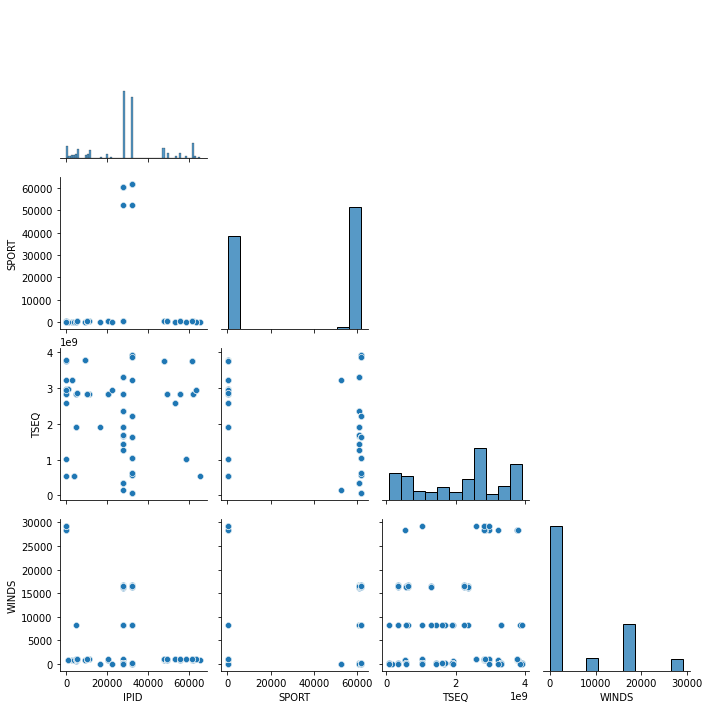

In [103]:
#可視化する
plt.figure(figsize=(8,5))
sns.pairplot(data = df, corner=True)
plt.show()

# Plot Malware's Data on Day13

<Figure size 576x360 with 0 Axes>

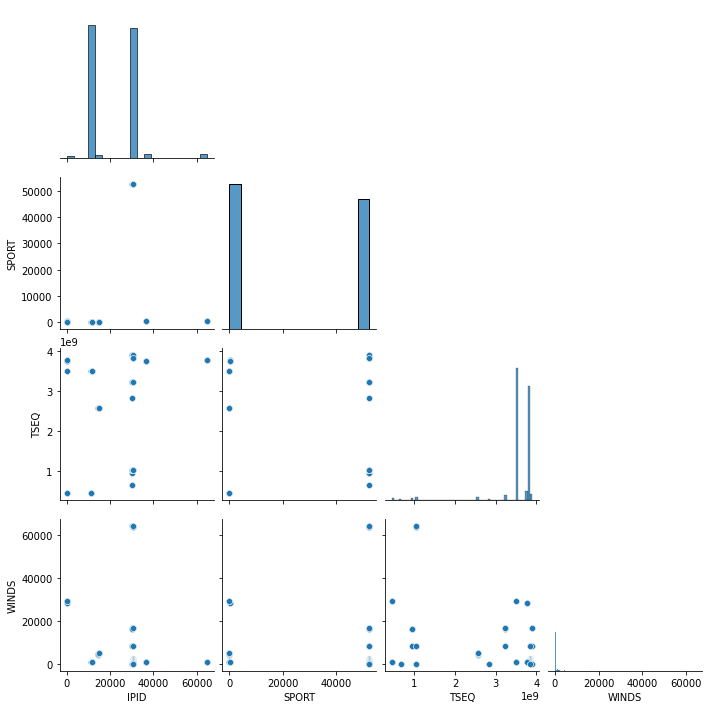

In [93]:
#可視化する
plt.figure(figsize=(8,5))
sns.pairplot(data = df, corner=True)
plt.show()

# Plot 20.000 packets on Pison Imac

<Figure size 576x360 with 0 Axes>

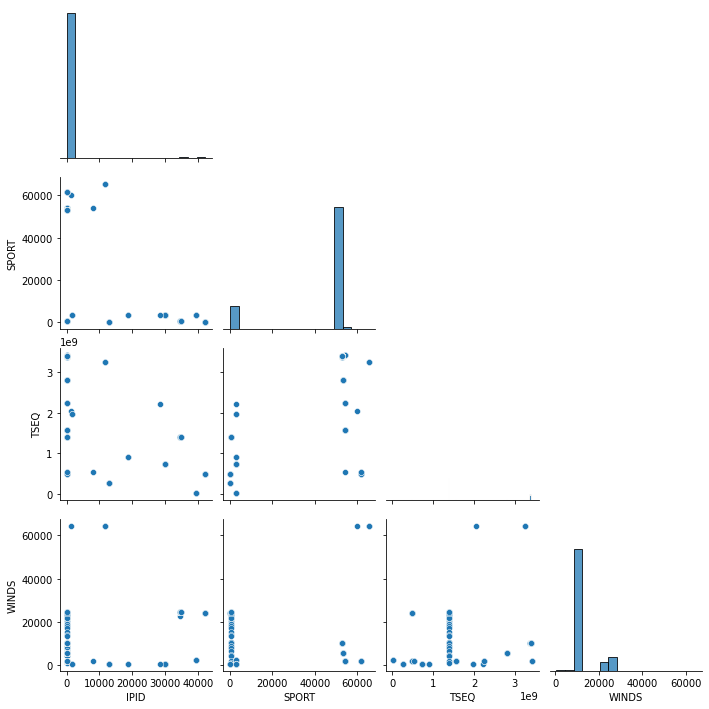

In [85]:
#可視化する
plt.figure(figsize=(8,5))
sns.pairplot(data = df, corner=True)
plt.show()

# Plot 5000 packet on gate

<Figure size 576x360 with 0 Axes>

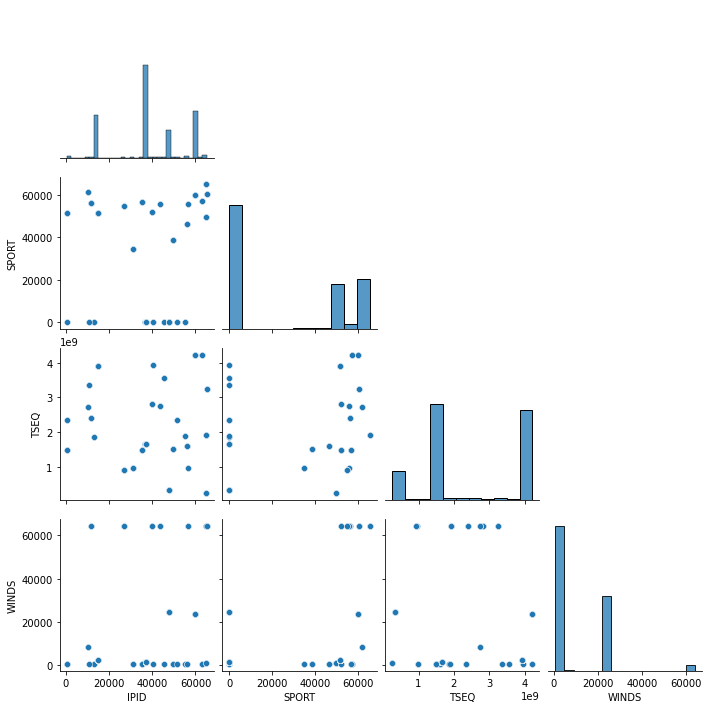

In [78]:
#可視化する
plt.figure(figsize=(8,5))
sns.pairplot(data = df, corner=True)
plt.show()

# Plot 10.000 packets on Pison Imac

In [64]:
df = pd.DataFrame(datalist, columns=metaif)
del df['TTL']
del df['SRCIP']
del df['DPORT']
df.head()

,IPID,DSTIP,SPORT,TSEQ,WINDS
0,0,170066906,53006,3771402018,10147
1,0,170066906,53006,3771402054,10147
2,0,170066906,53006,3771403502,10147
3,0,170066906,53006,3771404950,10147
4,0,170066906,53006,3771406398,10147


<Figure size 576x360 with 0 Axes>

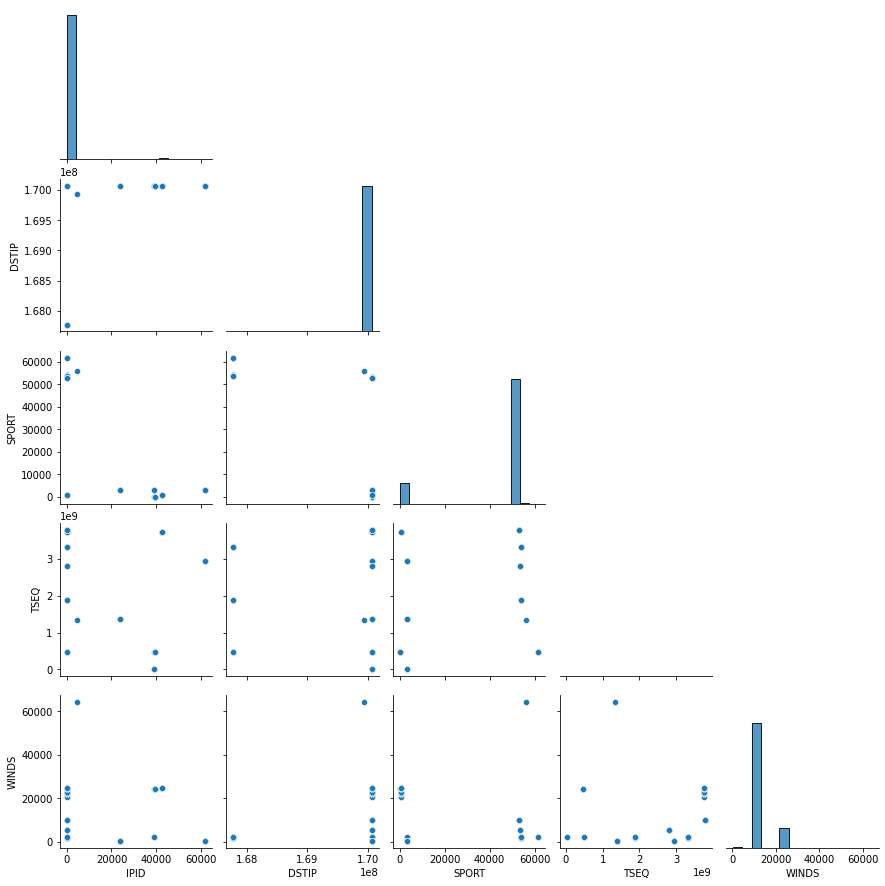

In [65]:
#可視化する
plt.figure(figsize=(8,5))
sns.pairplot(data = df, corner=True)
plt.show()

# Plot Malware Data on Day12

In [36]:
df = pd.DataFrame(datalist, columns=metaif)
del df['TTL']
del df['SRCIP']
del df['DPORT']
df.head()

,IPID,DSTIP,SPORT,TSEQ,WINDS
0,19839,225117234,49885,826939657,8192
1,19839,225117234,49885,826939657,8192
2,4163,168851728,80,894231465,8192
3,4163,168851728,80,894231465,8192
4,19840,225117234,49885,826939658,258


<Figure size 576x360 with 0 Axes>

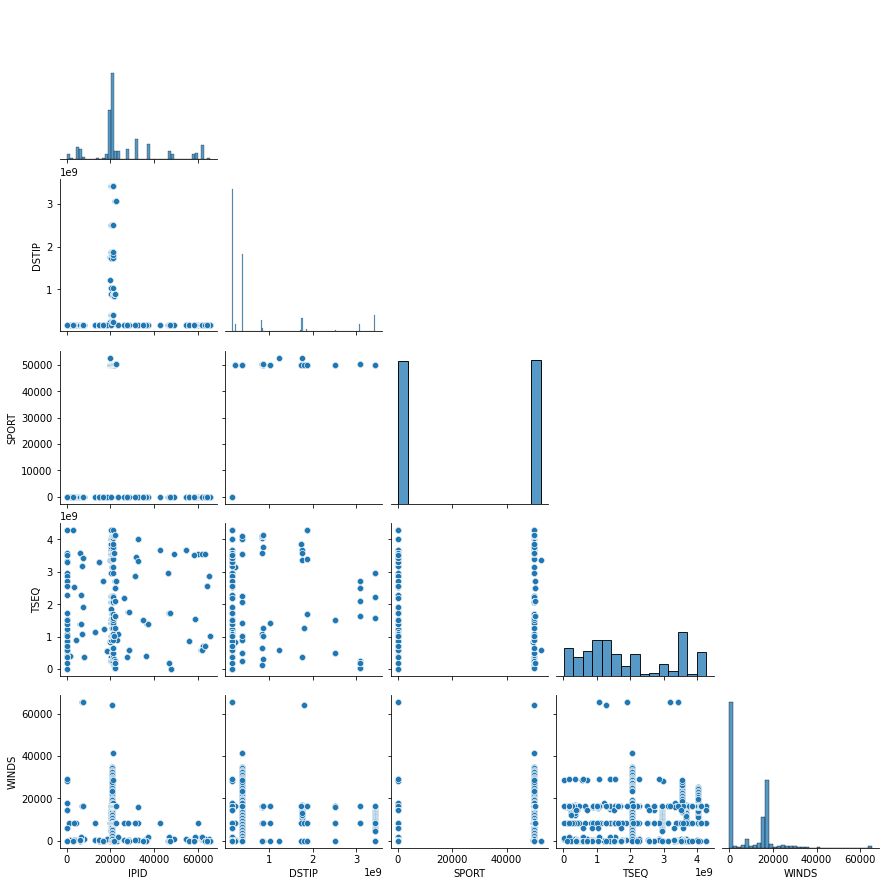

In [37]:
#可視化する
plt.figure(figsize=(8,5))
sns.pairplot(data = df, corner=True)
plt.show()

In [ ]:
#with open("malware-12.csv", "w") as ofile:
#	write = csv.writer(ofile)
#	write.writerow(metaif)
#	write.writerows(datalist)